In [1]:
# 1 Import dependencies
from sqlalchemy import create_engine
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
# 2 Connect to postgres/RDS database 
POSTGRES_ADDRESS = 'localhost' 
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = 'root' 
POSTGRES_DBNAME = 'AmazonProducts'

# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
.format(username=POSTGRES_USERNAME,
password=POSTGRES_PASSWORD,
ipaddress=POSTGRES_ADDRESS,
port=POSTGRES_PORT,
dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [3]:
# 3 Load database for customer segmentation
df = pd.read_sql_query('''SELECT * FROM segmentation_analysis''', con=cnx)
df.head()

,customer_id,apparel,furniture,music,office_products,personal_care_appliances,video_games,videos,watches
0,10018,NaN,NaN,None,NaN,NaN,4.0,NaN,NaN
1,10114,NaN,NaN,None,NaN,NaN,2.0,NaN,NaN
2,10141,9.0,NaN,None,NaN,NaN,NaN,NaN,NaN
3,10206,NaN,NaN,None,NaN,NaN,8.0,NaN,NaN
4,10408,NaN,NaN,None,NaN,NaN,NaN,NaN,3.0


In [4]:
# 4 Replace NaN values with zeros
# Each number represents the # of products bought in a specific product category, so no need for data scalling or normalizaiton
df = df.fillna(0)
df

,customer_id,apparel,furniture,music,office_products,personal_care_appliances,video_games,videos,watches
0,10018,0.0,0.0,0,0.0,0.0,4.0,0.0,0.0
1,10114,0.0,0.0,0,0.0,0.0,2.0,0.0,0.0
2,10141,9.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,10206,0.0,0.0,0,0.0,0.0,8.0,0.0,0.0
4,10408,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
560955,53096413,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0
560956,53096420,0.0,0.0,0,5.0,0.0,0.0,0.0,0.0
560957,53096482,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0
560958,53096559,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0


In [5]:
# 6 Scale data 
scaler = MinMaxScaler()

df[['apparel','furniture', 'music','office_products', 'personal_care_appliances', 'video_games', 
    'videos', 'watches']] = scaler.fit_transform(df[['apparel','furniture', 'music','office_products', 
                                                     'personal_care_appliances', 'video_games','videos', 'watches']])
df.head()

,customer_id,apparel,furniture,music,office_products,personal_care_appliances,video_games,videos,watches
0,10018,0.000000,0.0,0.0,0.0,0.0,0.009828,0.0,0.000000
1,10114,0.000000,0.0,0.0,0.0,0.0,0.004914,0.0,0.000000
2,10141,0.034884,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,10206,0.000000,0.0,0.0,0.0,0.0,0.019656,0.0,0.000000
4,10408,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.023622


In [6]:
# 7 Remove outliers
# keep only the ones that are within +3 to -3 standard deviations based on each column
# Review code later, too much repetition, could we do a function?

df_cleaned = df[np.abs(df.apparel-df.apparel.mean()) <= (3*df.apparel.std())]
df_cleaned = df[np.abs(df.furniture-df.furniture.mean()) <= (3*df.furniture.std())]
df_cleaned = df[np.abs(df.music-df.music.mean()) <= (3*df.music.std())]
df_cleaned = df[np.abs(df.office_products-df.office_products.mean()) <= (3*df.office_products.std())]
df_cleaned = df[np.abs(df.personal_care_appliances-df.personal_care_appliances.mean()) <= (3*df.personal_care_appliances.std())]
df_cleaned = df[np.abs(df.office_products-df.office_products.mean()) <= (3*df.office_products.std())]
df_cleaned = df[np.abs(df.video_games-df.video_games.mean()) <= (3*df.video_games.std())]
df_cleaned = df[np.abs(df.videos-df.videos.mean()) <= (3*df.videos.std())]
df_cleaned = df[np.abs(df.watches-df.watches.mean()) <= (3*df.watches.std())]
df_cleaned

,customer_id,apparel,furniture,music,office_products,personal_care_appliances,video_games,videos,watches
0,10018,0.000000,0.0,0.0,0.000000,0.0,0.009828,0.000000,0.000000
1,10114,0.000000,0.0,0.0,0.000000,0.0,0.004914,0.000000,0.000000
2,10141,0.034884,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,10206,0.000000,0.0,0.0,0.000000,0.0,0.019656,0.000000,0.000000
4,10408,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.023622
...,...,...,...,...,...,...,...,...,...
560955,53096413,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003497,0.000000
560956,53096420,0.000000,0.0,0.0,0.041322,0.0,0.000000,0.000000,0.000000
560957,53096482,0.000000,0.0,0.0,0.024793,0.0,0.000000,0.000000,0.000000
560958,53096559,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003497,0.000000


In [7]:
# 8 customer_id is the index
df_cleaned = df_cleaned.set_index('customer_id')
df_cleaned.head()

,apparel,furniture,music,office_products,personal_care_appliances,video_games,videos,watches
customer_id,,,,,,,,
10018,0.000000,0.0,0.0,0.0,0.0,0.009828,0.0,0.000000
10114,0.000000,0.0,0.0,0.0,0.0,0.004914,0.0,0.000000
10141,0.034884,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
10206,0.000000,0.0,0.0,0.0,0.0,0.019656,0.0,0.000000
10408,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.023622


In [8]:
# Create K Means model
# K-means is an unsupervised learning algorithm used to identify and 
# solve clustering issues. The K-means algorithm groups the data into K clusters,
# where belonging to a cluster is based on some similarity or distance measure to a centroid. A centroid is a data point 
#that is the arithmetic mean position of all the points on a cluster.

In [9]:
# 9 Define the optimal number of clusters

# Store values of K to plot
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i,n_init=10, random_state=0)
    km.fit(df_cleaned)
    inertia.append(km.inertia_)


In [21]:
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [11]:
# 11 Create unsupervised KMeans model for 5 clusters as per elbow curve
kmeans = KMeans(n_clusters=5, n_init=10).fit(df_cleaned)

# Get clusters to interpret 
df_cleaned['cluster'] = kmeans.labels_

print(df_cleaned.head())

              apparel  furniture  music  office_products  \
customer_id                                                
10018        0.000000        0.0    0.0              0.0   
10114        0.000000        0.0    0.0              0.0   
10141        0.034884        0.0    0.0              0.0   
10206        0.000000        0.0    0.0              0.0   
10408        0.000000        0.0    0.0              0.0   

             personal_care_appliances  video_games  videos   watches  cluster  
customer_id                                                                    
10018                             0.0     0.009828     0.0  0.000000        2  
10114                             0.0     0.004914     0.0  0.000000        2  
10141                             0.0     0.000000     0.0  0.000000        0  
10206                             0.0     0.019656     0.0  0.000000        2  
10408                             0.0     0.000000     0.0  0.023622        2  


In [12]:
df_cleaned.to_csv(r'F:\UniPrj\Big Data Project\Analysis Data\kmeans_customer_segments.csv')
df_cleaned.head()

,apparel,furniture,music,office_products,personal_care_appliances,video_games,videos,watches,cluster
customer_id,,,,,,,,,
10018,0.000000,0.0,0.0,0.0,0.0,0.009828,0.0,0.000000,2
10114,0.000000,0.0,0.0,0.0,0.0,0.004914,0.0,0.000000,2
10141,0.034884,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0
10206,0.000000,0.0,0.0,0.0,0.0,0.019656,0.0,0.000000,2
10408,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.023622,2


In [13]:
# 13 Count # of customers in each cluster
count_df = df_cleaned.groupby(['cluster']).size()
count_df

cluster
0     85240
1     61315
2    239806
3     78705
4     85861
dtype: int64

In [14]:
# 14 Create counter for each cluster
print(Counter(kmeans.labels_))

Counter({2: 239806, 4: 85861, 0: 85240, 3: 78705, 1: 61315})


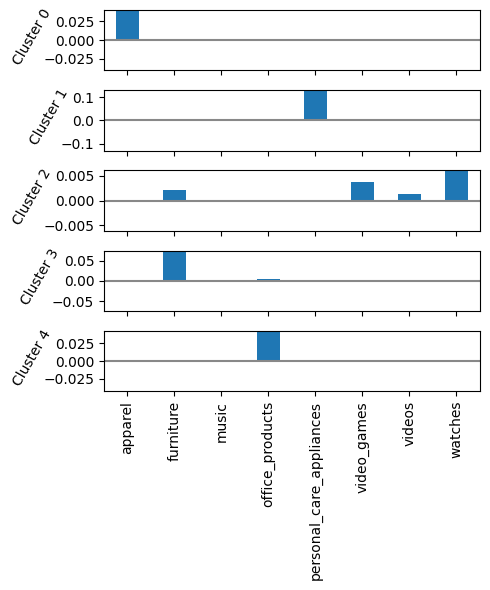

In [15]:
# 15 Understand the relationship between clusters and product categories

syms = sorted(['apparel', 'furniture', 'music', 'office_products', 
               'personal_care_appliances', 'video_games', 'videos', 'watches'])

centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(5, 6), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i}', rotation=60)
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

In [22]:
# Get customer count for chart
count_df = df_cleaned.groupby(['cluster']).size().reset_index()
# Add column name 'total customers'
count_df = count_df.rename(columns={'cluster': 'customer_segment'})
count_df .columns.values[1] = 'total_customers'
count_df

,customer_segment,total_customers
0,0,85240
1,1,61315
2,2,239806
3,3,78705
4,4,85861


In [23]:
# rename clusters based on categories to make it easier to read charts
count_df['customer_segment'] = count_df['customer_segment'].replace([0],'0 = apparel')
count_df['customer_segment'] = count_df['customer_segment'].replace([1],'1 = personal care appliances')
count_df['customer_segment'] = count_df['customer_segment'].replace([2],'2 = multi-cateogry')
count_df['customer_segment'] = count_df['customer_segment'].replace([3],'3 = furniture')
count_df['customer_segment'] = count_df['customer_segment'].replace([4],'4 = office products')
# Include percentage
count_df['percentage_total'] = (count_df ['total_customers'] /count_df ['total_customers'].sum()) * 100
 
# Round percentage 
count_df  = count_df.round(decimals=0)
count_df 

,customer_segment,total_customers,percentage_total
0,0 = apparel,85240,15.0
1,1 = personal care appliances,61315,11.0
2,2 = multi-cateogry,239806,44.0
3,3 = furniture,78705,14.0
4,4 = office products,85861,16.0


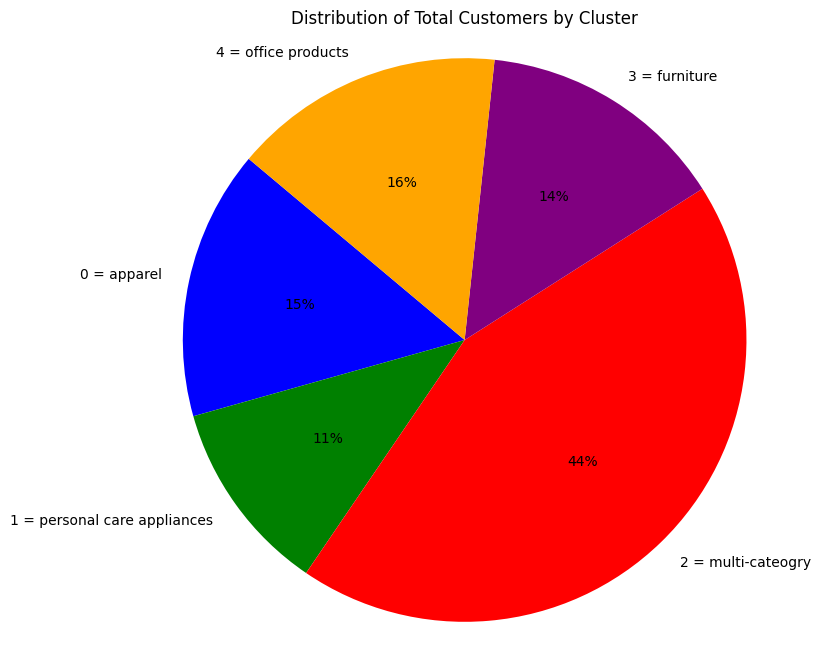

In [27]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_df ['total_customers'], labels=count_df['customer_segment'], colors=colors, autopct='%1.0f%%', startangle=140)

# Set title
plt.title("Distribution of Total Customers by Cluster")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


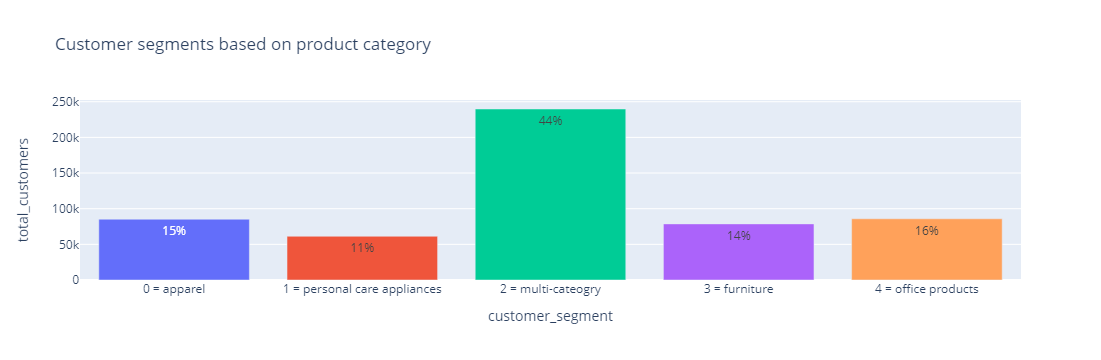

In [28]:
# Add '%' sign to percentage total values
count_df['percentage_total'] = count_df['percentage_total'].apply(lambda x: '{0:1.0f}%'.format(x))
# Create chart to show values and % of total
fig = px.bar(count_df , x='customer_segment', 
             y='total_customers',
             title='Customer segments based on product category',
             color='customer_segment',
             text= count_df['percentage_total']
             )

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
Summary Report

In this analysis, we performed K-means clustering on the dataset to segment customers into five clusters. Here are the key findings:

- Cluster 0: Apparel 
- Cluster 1: Personal Care Appliances
- Cluster 2: Multi-Category
- Cluster 3: Furniture
- Cluster 4: Office Products 


Insights:

-The largest segment is Cluster 2, Multi-Category, with 44% of customers buying products from Multi-Category
-Cluster 4 (Office Products ) is a priority to target in future marketing campaigns looking to broaden purchasing categories of existing customers.
-Create additional campaigns targeting clusters 0, 1 and 3, by giving discounts in other product categories to incentivize product mix and sales.